In [1]:
!nvidia-smi

Sun May 18 19:29:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [4]:
# Predict using a pretrained YOLO model (e.g., YOLO11n) on an image
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/bus.jpg'

100% 6.25M/6.25M [00:00<00:00, 349MB/s]
Ultralytics 8.3.139 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100% 134k/134k [00:00<00:00, 65.5MB/s]
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 40.2ms
Speed: 13.2ms preprocess, 40.2ms inference, 299.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


Custom training


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [5]:
!ls

data.yaml  test  train	valid


In [18]:
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=25 imgsz=224 plots=True

Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=Fal

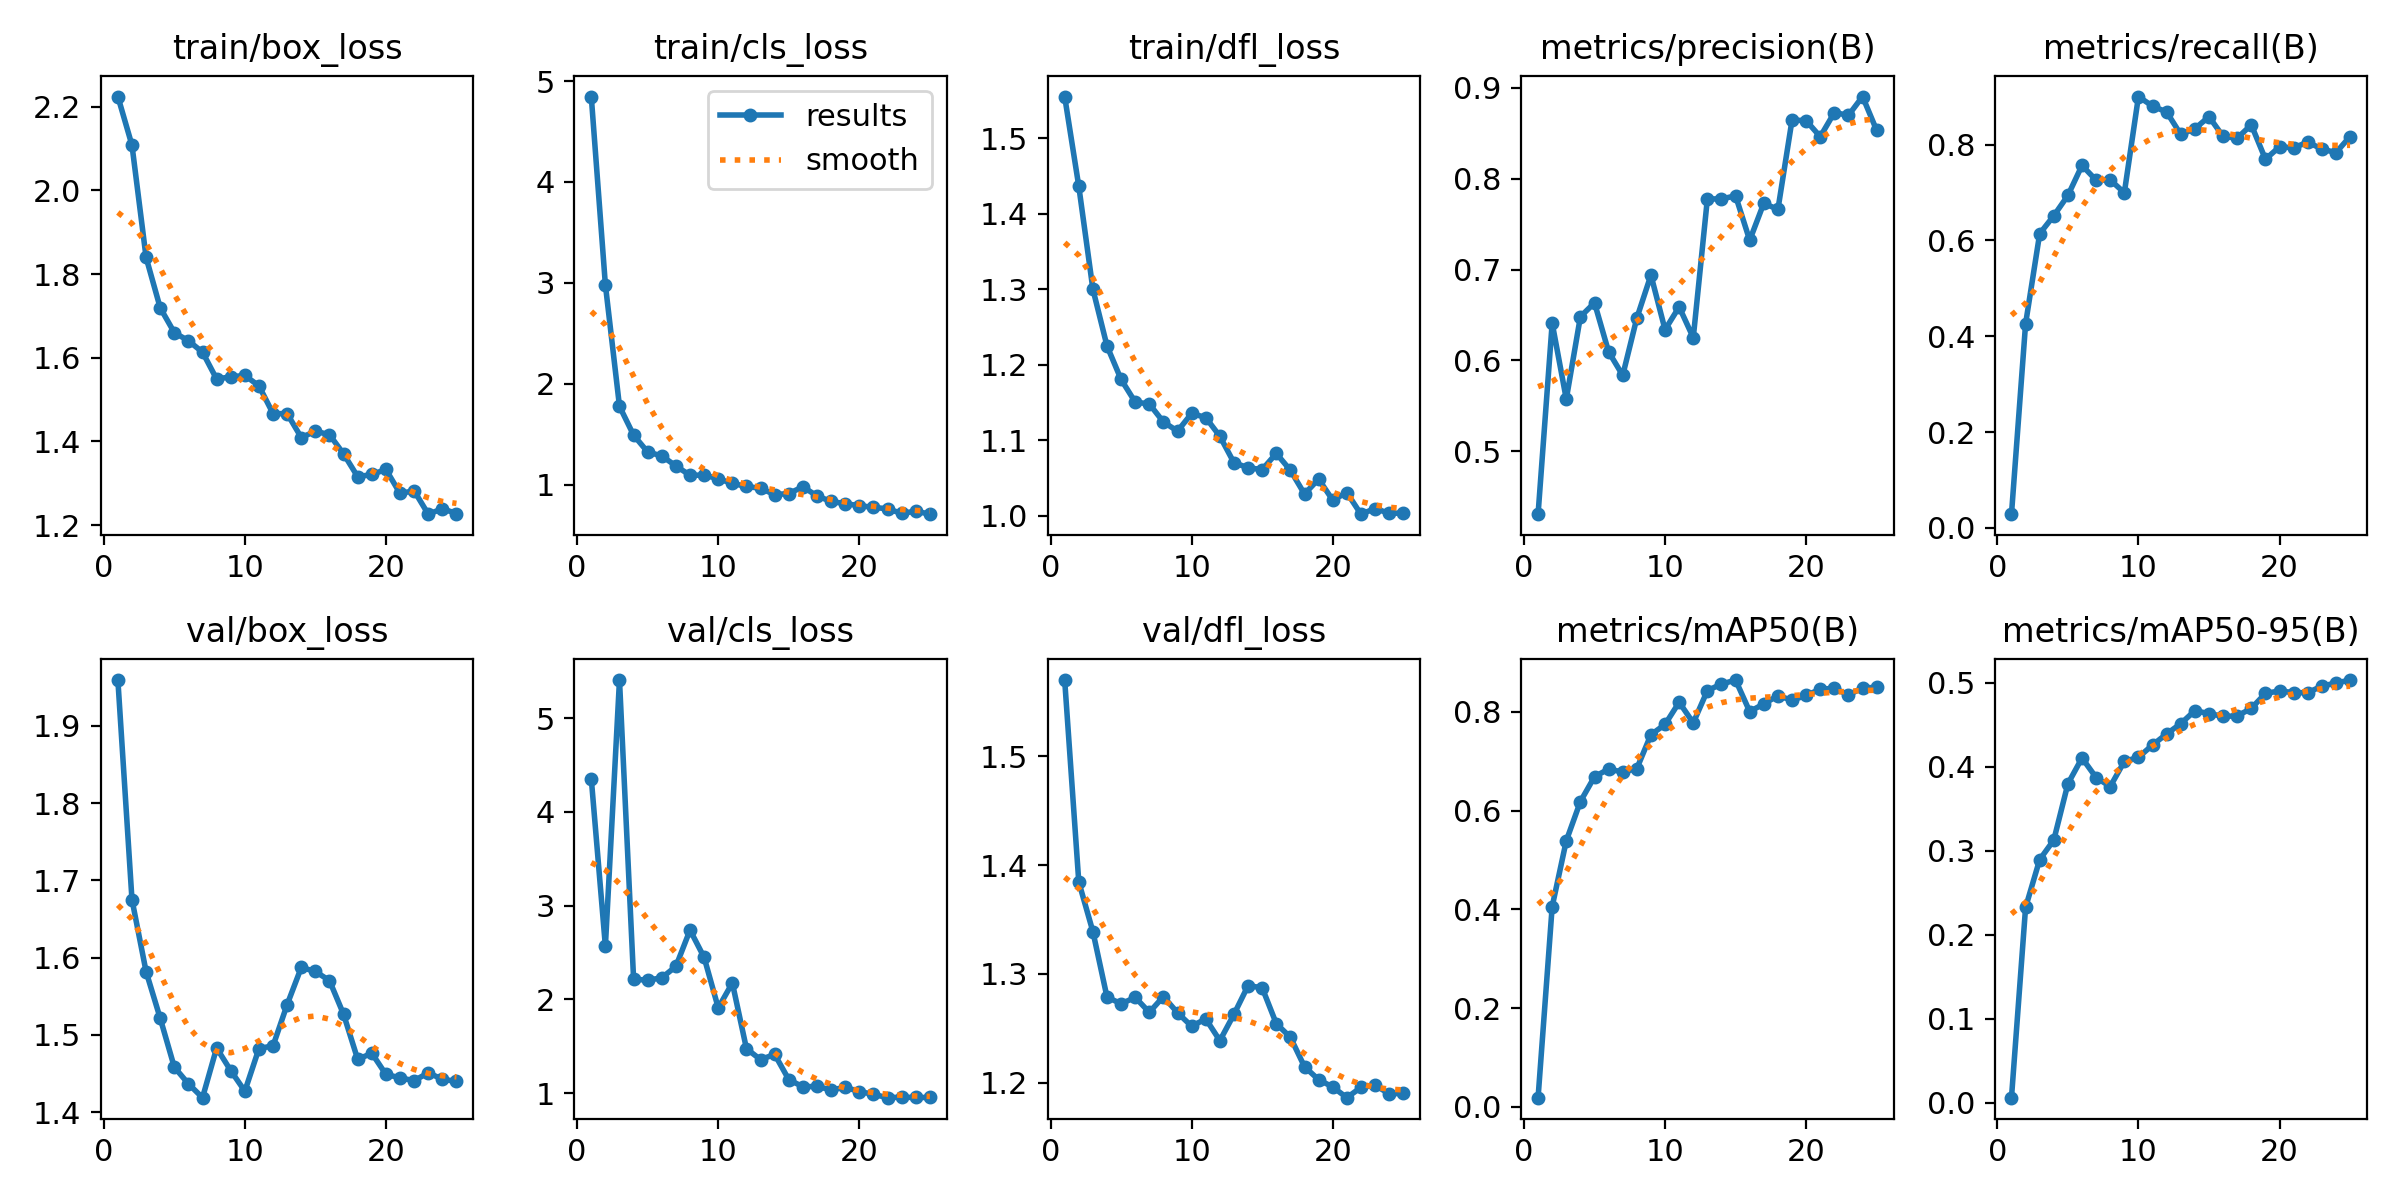

In [19]:
from IPython.display import Image
Image(filename='runs/detect/train4/results.png',width=600)

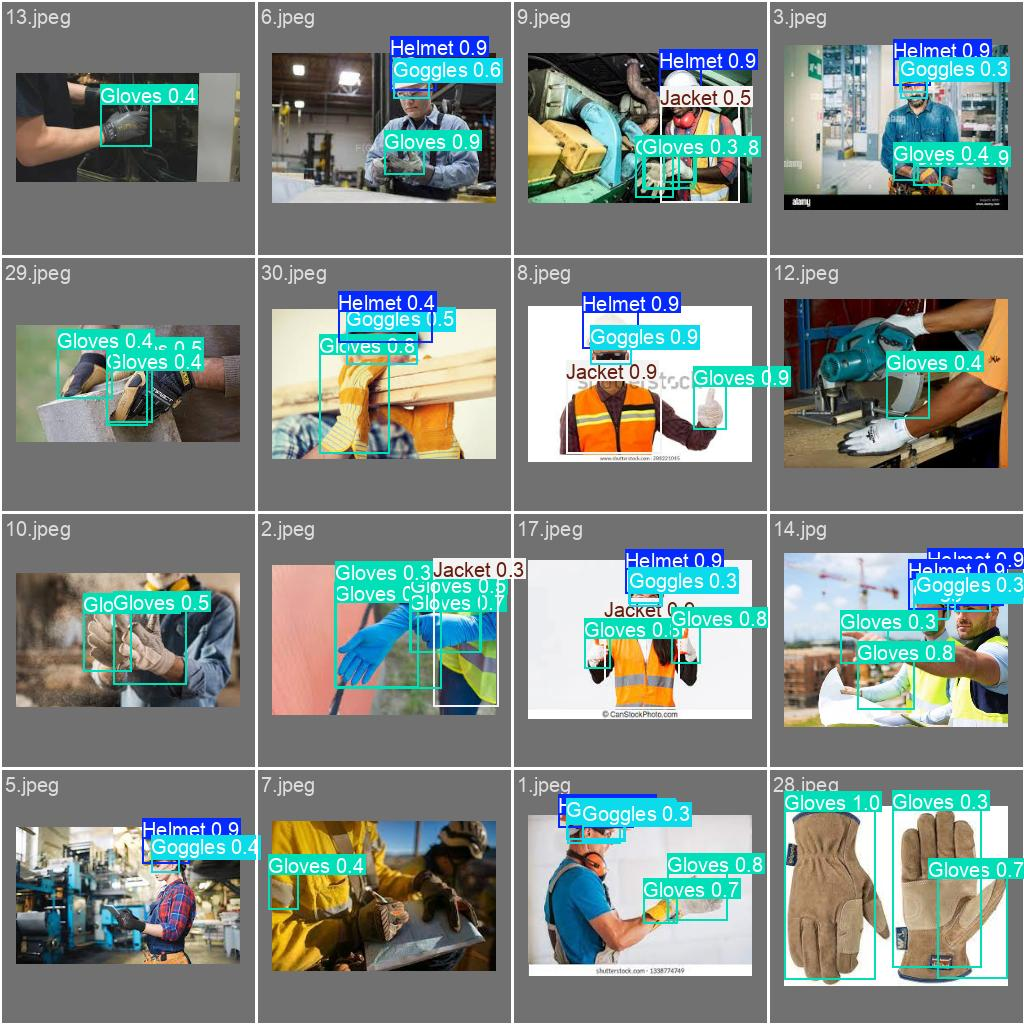

In [20]:
Image(filename='runs/detect/train4/val_batch0_pred.jpg',width=600)


Validate Custom Model


In [21]:
!yolo task=detect mode=val model=/content/drive/MyDrive/data/runs/detect/train4/weights/best.pt data=data.yaml epochs=10 imgsz=640

Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 21.5±40.3 MB/s, size: 47.3 KB)
val: Scanning /content/drive/MyDrive/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:00<00:00,  2.04it/s]
                   all         31        101      0.532      0.562      0.552      0.252
                Helmet         17         18      0.818      0.944      0.943      0.585
               Goggles          9          9      0.348      0.778      0.638      0.227
                Jacket         13         14      0.613      0.429      0.483      0.229
                Gloves         30         52      0.359       0.25      0.201     0.0978
              Footwear          4          8       0.52 

Inference with Custom Model


In [23]:
!yolo task=detect mode=predict model=runs/detect/train4/weights/best.pt conf=0.25 source=/content/drive/MyDrive/data/test/images


Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs

image 1/31 /content/drive/MyDrive/data/test/images/1.jpeg: 192x224 2 Goggless, 2 Glovess, 42.1ms
image 2/31 /content/drive/MyDrive/data/test/images/10.jpeg: 160x224 4 Glovess, 46.0ms
image 3/31 /content/drive/MyDrive/data/test/images/11.jpeg: 224x224 3 Glovess, 8.7ms
image 4/31 /content/drive/MyDrive/data/test/images/12.jpeg: 192x224 1 Gloves, 9.1ms
image 5/31 /content/drive/MyDrive/data/test/images/13.jpeg: 128x224 1 Gloves, 40.7ms
image 6/31 /content/drive/MyDrive/data/test/images/14(1).jpeg: 224x224 1 Gloves, 9.2ms
image 7/31 /content/drive/MyDrive/data/test/images/14.jpg: 192x224 2 Helmets, 2 Glovess, 9.6ms
image 8/31 /content/drive/MyDrive/data/test/images/15.jpeg: 224x224 (no detections), 8.5ms
image 9/31 /content/drive/MyDrive/data/test/images/16.jpeg: 224x160 1 Helmet, 1 Goggles, 1 Jacket, 1 Gloves, 38.4ms
image 10

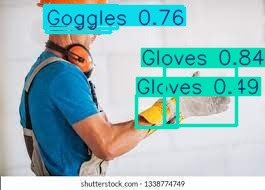

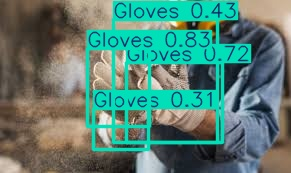

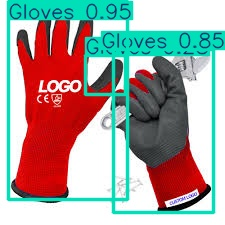

In [24]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")